# STEPS RAMP

This notebook simulates an algorithm for stepping a stepper motor, ramping up and down the steps speed

In [1]:
# IMPORTS
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 300 #steps/s/s
vmax = 1000 #steps/s
no_steps = 10000

step_durations = []

min_step_duration = 1/vmax

current_v = 0

#calculate the length of the ramp
no_ramp_steps = int((vmax**2) /(2*a))

if no_steps < 2*no_ramp_steps:  #handle the case when full vmax cannot be reached
    no_ramp_steps = int(no_steps/2)

#calculate the length of constant velocity
no_const_steps = no_steps - 2*no_ramp_steps

#ramp up
print(f"do the ramp up")
i = 0
while i < no_ramp_steps:
    i +=1
    #calculate time step
    step_duration = np.sqrt(2*(i+1)/a)-np.sqrt(2*i/a)
    current_v = 1/step_duration
    step_durations += [max(step_duration, min_step_duration)]
    print(f"step_duration: {step_duration} s; current v: {current_v} steps/s")


current_v = vmax

print(f"do the current drive")
#drive constantly
i=1
while i < no_const_steps:
    step_durations += [1/current_v]
    i+=1

print(f"do the ramp down")
#ramp down
i = 0
while current_v > 0:
    #get a step for calculation
    i+=1 #advance the step
    calc_step = no_ramp_steps-i
    #calculate time step
    step_duration = np.sqrt(2*(calc_step+1)/a) - np.sqrt(2*calc_step/a) 
    current_v = 1/step_duration
    step_durations += [step_duration]
    print(f"calc_step:{calc_step}; step_duration: {step_duration} s; current v: {current_v} steps/s")

do the ramp up
step_duration: 0.033820395745152554 s; current v: 29.56795678960466 steps/s
step_duration: 0.02595130239938434 s; current v: 38.53371151128522 steps/s
step_duration: 0.021877959948235715 s; current v: 45.70810086342818 steps/s
step_duration: 0.01927486964951014 s; current v: 51.881025303090155 steps/s
step_duration: 0.017425814164944653 s; current v: 57.386127875258225 steps/s
step_duration: 0.016024689946928655 s; current v: 62.40370349203938 steps/s
step_duration: 0.01491541772892166 s; current v: 67.04471964341673 steps/s
step_duration: 0.014008866602467474 s; current v: 71.38336229312537 steps/s
step_duration: 0.013249915468843299 s; current v: 75.47217960382194 steps/s
step_duration: 0.012602390407370934 s; current v: 79.35002548525367 steps/s
step_duration: 0.012041432320086976 s; current v: 83.0465988943728 steps/s
step_duration: 0.011549316402975907 s; current v: 86.58521120283193 steps/s
step_duration: 0.011113017452794416 s; current v: 89.98456128119781 steps/s

C:\Users\rsteinhoefler\AppData\Local\Temp\ipykernel_12076\2493990100.py:49: RuntimeWarning: invalid value encountered in sqrt
  step_duration = np.sqrt(2*(calc_step+1)/a) - np.sqrt(2*calc_step/a)


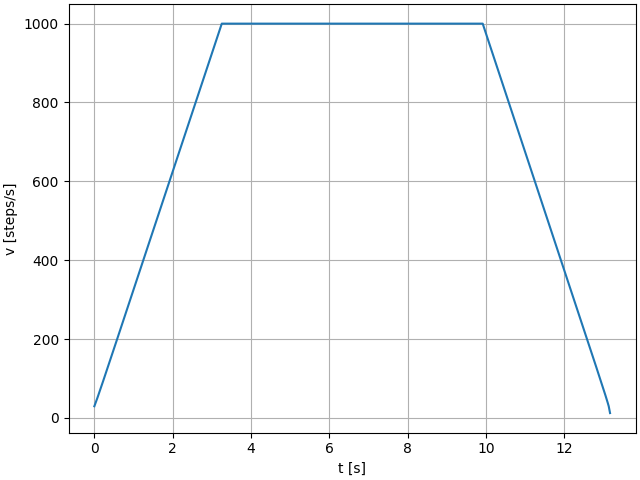

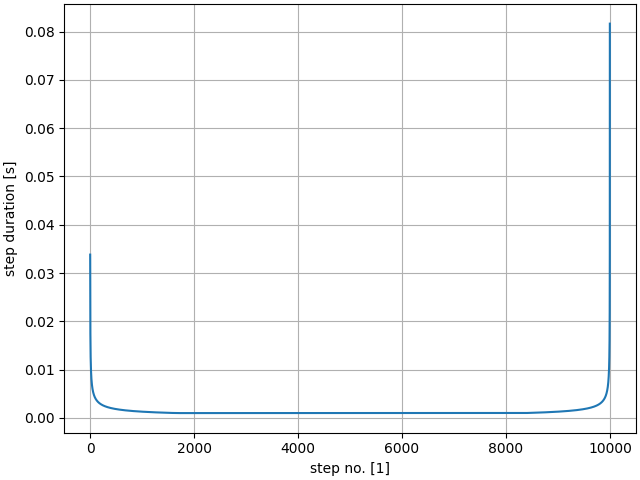

In [3]:
#calculate velocities
v = [1/t for t in step_durations]

fig, ax = plt.subplots(layout='constrained')

t = [np.sum(step_durations[:i]) for i in range(len(step_durations))]

ax.plot(t, v)
ax.set_xlabel("t [s]")
ax.set_ylabel("v [steps/s]")
ax.grid()


fig, ax = plt.subplots(layout='constrained')

ax.plot(step_durations)
ax.set_ylabel("step duration [s]")
ax.set_xlabel("step no. [1]")
ax.grid()